In [76]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bati-Bank_Credit-Scoring-Model/modified_dataset.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,5,1,-0.046371,1000,2018-11-15 02:18:49+00:00,2,0,0.170118,-0.067623,119,3042.294251,2,15,11,2018,False,False,False,False,False,False,False,False,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,3,19,-0.054643,20,2018-11-15 02:19:08+00:00,2,0,0.170118,-0.067623,119,3042.294251,2,15,11,2018,False,True,False,False,False,False,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,5,0,-0.050426,500,2018-11-15 02:44:21+00:00,2,0,0.165122,-0.072568,2,0.000000,2,15,11,2018,False,False,False,False,False,False,False,False,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,11,0.107717,21800,2018-11-15 03:32:55+00:00,2,0,0.175567,-0.008155,38,17169.241610,3,15,11,2018,False,False,False,False,False,False,False,True,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,3,19,-0.059704,644,2018-11-15 03:34:21+00:00,2,0,0.175567,-0.008155,38,17169.241610,3,15,11,2018,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       95662 non-null  object 
 1   BatchId                             95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   CountryCode                         95662 non-null  int64  
 6   ProviderId                          95662 non-null  int64  
 7   ProductId                           95662 non-null  int64  
 8   Amount                              95662 non-null  float64
 9   Value                               95662 non-null  int64  
 10  TransactionStartTime                95662 non-null  object 
 11  PricingStrategy                     95662

In [ ]:
# check target balance (FRAUDRESULT)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [ ]:
# REASON - check categories
df.stb.freq(['Amount'], style = True)

,Amount,count,percent,cumulative_count,cumulative_percent
0,-0.046371,"17,091",17.87%,"17,091",17.87%
1,-0.054887,"8,513",8.90%,"25,604",26.77%
2,0.026618,"8,260",8.63%,"33,864",35.40%
3,-0.038261,"5,489",5.74%,"39,353",41.14%
4,-0.050426,"5,246",5.48%,"44,599",46.62%
5,-0.095031,"5,110",5.34%,"49,709",51.96%
6,-0.013932,"4,595",4.80%,"54,304",56.77%
7,-0.054643,"2,608",2.73%,"56,912",59.49%
8,-0.055292,"2,405",2.51%,"59,317",62.01%
9,-0.062591,"2,345",2.45%,"61,662",64.46%


In [ ]:
# Check numeric variables
df.describe()

,CountryCode,ProviderId,ProductId,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
count,95662.0,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.495000e+04,95662.000000,95662.000000,95662.000000,95662.000000
mean,0.0,3.657157,12.388786,-1.029174e-15,9.900584e+03,2.255974,0.002018,-4.254551e-16,1.865823e-16,392.982982,1.803696e+04,12.447722,15.902898,6.566233,2018.497115
std,0.0,1.309014,7.217021,1.000005e+00,1.231221e+05,0.732924,0.044872,1.000005e+00,1.000005e+00,878.631072,8.929570e+04,4.846964,8.962822,5.224310,0.499994
min,0.0,0.000000,0.000000,-8.164376e+00,2.000000e+00,0.000000,0.000000,-4.646278e+00,-5.038543e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000,2018.000000
25%,0.0,3.000000,6.000000,-5.488653e-02,2.750000e+02,2.000000,0.000000,1.678282e-01,-6.368859e-02,32.000000,3.206563e+03,8.000000,8.000000,1.000000,2018.000000
50%,0.0,4.000000,16.000000,-4.637114e-02,1.000000e+03,2.000000,0.000000,1.743188e-01,-5.187601e-02,93.000000,5.896327e+03,13.000000,16.000000,11.000000,2018.000000
75%,0.0,5.000000,19.000000,-3.177332e-02,5.000000e+03,2.000000,0.000000,1.975924e-01,-3.078067e-02,273.000000,1.038269e+04,17.000000,24.000000,12.000000,2019.000000
max,0.0,5.000000,22.000000,8.007129e+01,9.880000e+06,4.000000,1.000000,3.992660e+00,1.003127e+02,4091.000000,3.309916e+06,23.000000,31.000000,12.000000,2019.000000


In [ ]:
# missing check
df.stb.missing()

,missing,total,percent
Std_Dev_Transaction_Amount,712,95662,0.744287
BatchId,0,95662,0.000000
ChannelId_ChannelId_3,0,95662,0.000000
ChannelId_ChannelId_2,0,95662,0.000000
ProductCategory_utility_bill,0,95662,0.000000
ProductCategory_tv,0,95662,0.000000
ProductCategory_transport,0,95662,0.000000
ProductCategory_ticket,0,95662,0.000000
ProductCategory_other,0,95662,0.000000
ProductCategory_movies,0,95662,0.000000


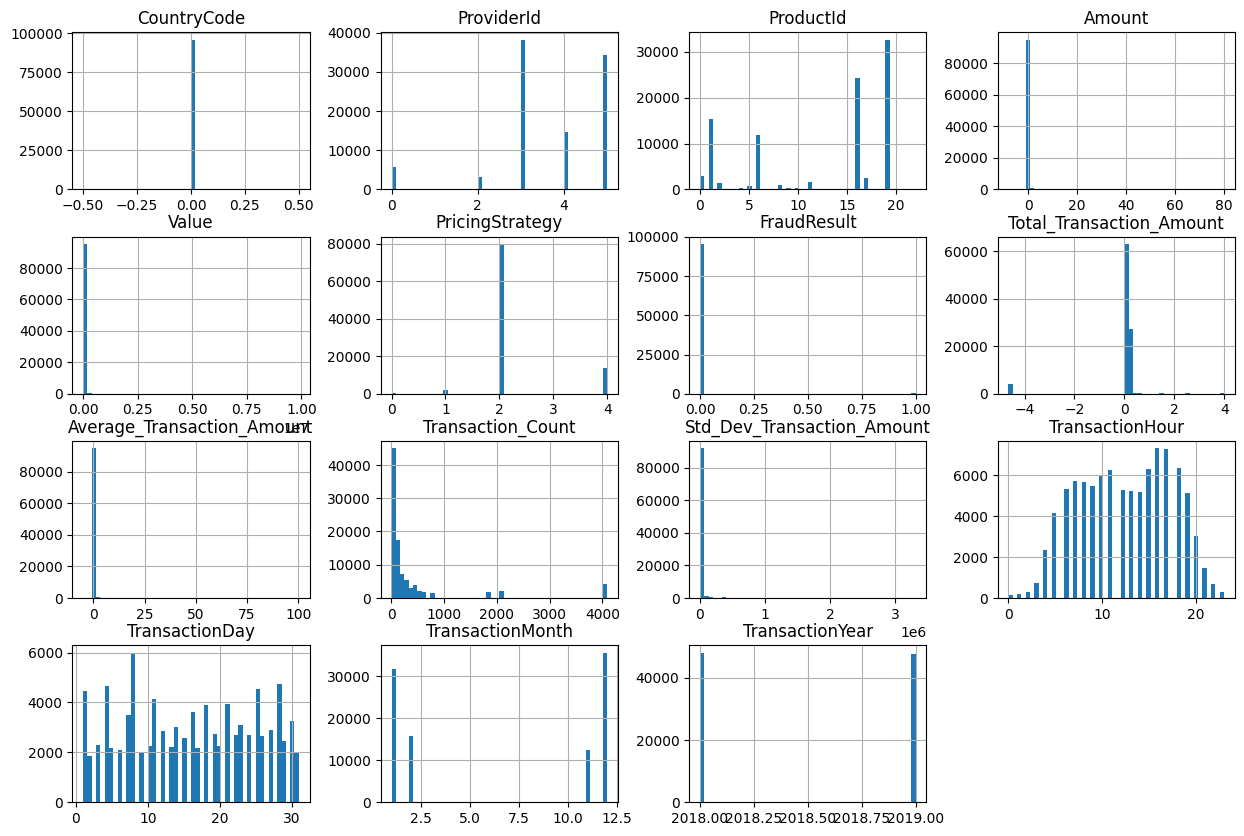

In [ ]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [ ]:
# Verify the data type of 'CountryCode' and clean if necessary
print(df['CountryCode'].dtype)
print(df['CountryCode'].unique())  # Check for any anomalies

int64
[0]


In [ ]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
numeric_df_cleaned = numeric_df.drop(columns=['CountryCode'])

In [ ]:
numeric_df_cleaned.corr()

,ProviderId,ProductId,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
ProviderId,1.000000,-0.163926,-0.049208,-0.062083,-0.143834,-0.051937,0.100131,-0.041803,-0.050651,-0.056021,0.004724,0.016366,-0.010075,0.011386
ProductId,-0.163926,1.000000,-0.048816,-0.051026,-0.109472,-0.033508,0.071280,-0.033393,-0.033934,-0.059422,0.007181,0.047714,0.061947,-0.062104
Amount,-0.049208,-0.048816,1.000000,0.989692,-0.061931,0.557370,0.116830,0.694881,-0.057588,0.479779,-0.001611,-0.003905,-0.009060,0.010738
Value,-0.062083,-0.051026,0.989692,1.000000,-0.017020,0.566739,0.035650,0.684791,0.014352,0.483188,0.000474,-0.024104,-0.010452,0.012001
PricingStrategy,-0.143834,-0.109472,-0.061931,-0.017020,1.000000,-0.033821,-0.504173,-0.069259,0.406005,-0.050903,0.007423,-0.131597,-0.031291,0.029757
FraudResult,-0.051937,-0.033508,0.557370,0.566739,-0.033821,1.000000,0.063469,0.339021,-0.015938,0.365098,0.008295,-0.008636,-0.008887,0.009811
Total_Transaction_Amount,0.100131,0.071280,0.116830,0.035650,-0.504173,0.063469,1.000000,0.168129,-0.861501,0.156144,-0.026900,0.225701,-0.000049,0.002388
Average_Transaction_Amount,-0.041803,-0.033393,0.694881,0.684791,-0.069259,0.339021,0.168129,1.000000,-0.082875,0.696192,0.006647,0.008856,-0.017440,0.019253
Transaction_Count,-0.050651,-0.033934,-0.057588,0.014352,0.406005,-0.015938,-0.861501,-0.082875,1.000000,-0.022182,0.043682,-0.171367,0.065905,-0.064602
Std_Dev_Transaction_Amount,-0.056021,-0.059422,0.479779,0.483188,-0.050903,0.365098,0.156144,0.696192,-0.022182,1.000000,0.019049,-0.014319,-0.043346,0.046142


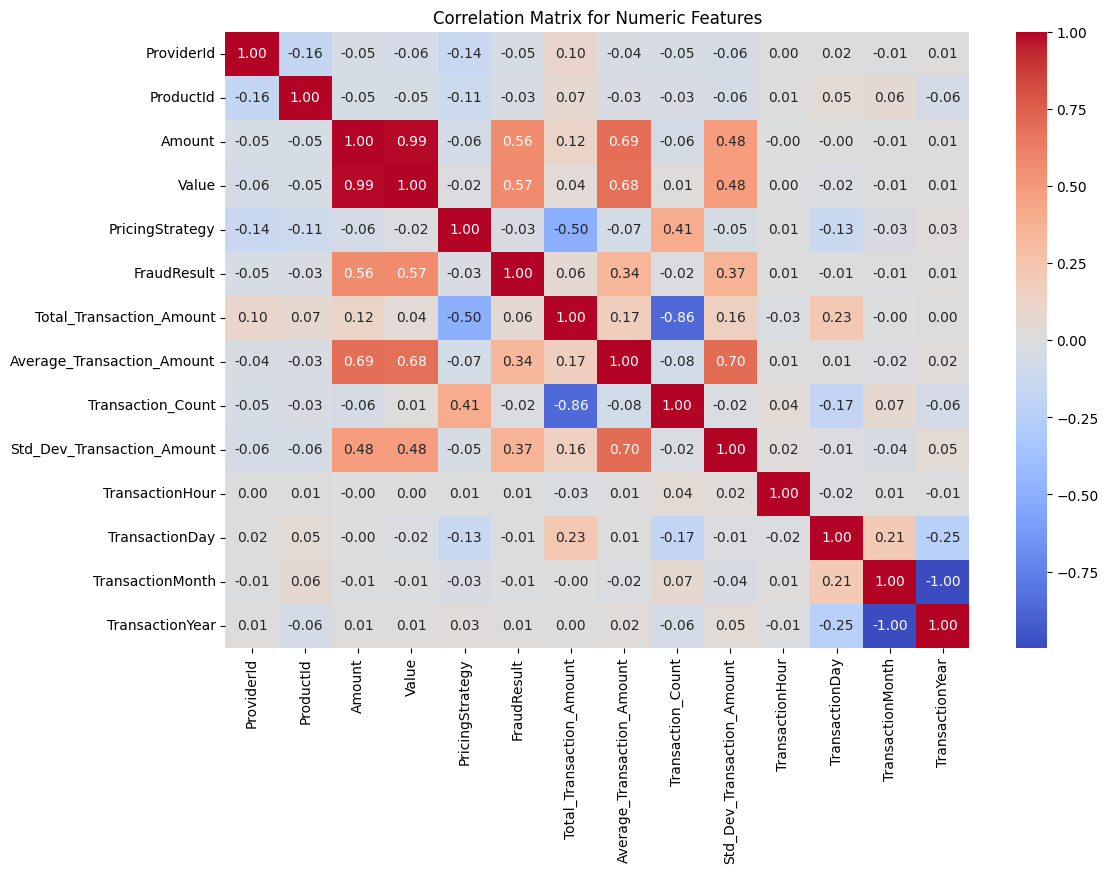

In [ ]:
# Compute the updated correlation matrix
correlation_matrix = numeric_df_cleaned.corr()

# Visualize the updated correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

In [ ]:
# Filter strong correlations
strong_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Convert to a DataFrame for better readability
strong_corr_table = (
    strong_corr.stack()  # Flatten the DataFrame
    .reset_index()       # Reset index to create a tabular format
    .rename(columns={0: 'Correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
)

In [ ]:
# Remove self-correlations (where Variable 1 == Variable 2)
strong_corr_table = strong_corr_table[strong_corr_table['Variable 1'] != strong_corr_table['Variable 2']]


In [ ]:
# Sort by absolute correlation value (optional)
strong_corr_table = strong_corr_table.sort_values(by='Correlation', key=abs, ascending=False)


In [ ]:
# Display the table
print("Strong Correlations (in table format):")
print(strong_corr_table)

Strong Correlations (in table format):
                    Variable 1                  Variable 2  Correlation
30             TransactionYear            TransactionMonth    -0.996205
29            TransactionMonth             TransactionYear    -0.996205
6                        Value                      Amount     0.989692
3                       Amount                       Value     0.989692
17    Total_Transaction_Amount           Transaction_Count    -0.861501
22           Transaction_Count    Total_Transaction_Amount    -0.861501
21  Average_Transaction_Amount  Std_Dev_Transaction_Amount     0.696192
24  Std_Dev_Transaction_Amount  Average_Transaction_Amount     0.696192
18  Average_Transaction_Amount                      Amount     0.694881
5                       Amount  Average_Transaction_Amount     0.694881
9                        Value  Average_Transaction_Amount     0.684791
19  Average_Transaction_Amount                       Value     0.684791
8                        

In [77]:
!pip install scorecardpy
!pip install monotonic-binning

import pandas as pd
import scorecardpy as sc
from sklearn.model_selection import train_test_split


In [78]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bati-Bank_Credit-Scoring-Model/modified_dataset.csv')

# Fill missing values in numerical columns
df['Std_Dev_Transaction_Amount'] = df['Std_Dev_Transaction_Amount'].fillna(df['Std_Dev_Transaction_Amount'].median())

# Check dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       95662 non-null  object 
 1   BatchId                             95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   CountryCode                         95662 non-null  int64  
 6   ProviderId                          95662 non-null  int64  
 7   ProductId                           95662 non-null  int64  
 8   Amount                              95662 non-null  float64
 9   Value                               95662 non-null  int64  
 10  TransactionStartTime                95662 non-null  object 
 11  PricingStrategy                     95662

In [79]:
# Drop non-numeric columns
columns_to_drop = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime']
df= df.drop(columns=columns_to_drop)


In [80]:
print(df.columns.tolist())

['CountryCode', 'ProviderId', 'ProductId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Dev_Transaction_Amount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']


In [81]:
train, test = sc.split_df(df, 'FraudResult', ratio=0.7, seed=999).values()

# Check for null values in training data
print(train.isnull().sum())


CountryCode                           0
ProviderId                            0
ProductId                             0
Amount                                0
Value                                 0
PricingStrategy                       0
FraudResult                           0
Total_Transaction_Amount              0
Average_Transaction_Amount            0
Transaction_Count                     0
Std_Dev_Transaction_Amount            0
TransactionHour                       0
TransactionDay                        0
TransactionMonth                      0
TransactionYear                       0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0
ProductCategory_other                 0
ProductCategory_ticket                0
ProductCategory_transport             0
ProductCategory_tv                    0
ProductCategory_utility_bill          0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0


In [82]:
print(train.head())

   CountryCode  ProviderId  ProductId    Amount  Value  PricingStrategy  FraudResult  Total_Transaction_Amount  Average_Transaction_Amount  Transaction_Count  Std_Dev_Transaction_Amount  TransactionHour  TransactionDay  TransactionMonth  TransactionYear  ProductCategory_data_bundles  \
0            0           5          1 -0.046371   1000                2            0                  0.170118                   -0.067623                119                 3042.294251                2              15                11             2018                         False   
1            0           3         19 -0.054643     20                2            0                  0.170118                   -0.067623                119                 3042.294251                2              15                11             2018                         False   
4            0           3         19 -0.059704    644                2            0                  0.175567                   -0.008155 

In [83]:
# Define the features and target
features = [
    'Amount', 'Value', 'Total_Transaction_Amount',
    'Average_Transaction_Amount', 'Transaction_Count', 'Std_Dev_Transaction_Amount'
]
target = 'FraudResult'


In [84]:
# Train-test split
train, test = train_test_split(df, test_size=0.3, random_state=999, stratify=df[target])

In [85]:
print(train.columns.tolist())

['CountryCode', 'ProviderId', 'ProductId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Dev_Transaction_Amount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']


In [87]:
print(train.columns.tolist())

['CountryCode', 'ProviderId', 'ProductId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Dev_Transaction_Amount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']


In [88]:
# Perform WoE binning
bins = sc.woebin(train, y=target, x=features, bin_num_limit=5)


[INFO] creating woe binning ...
Binning on 66963 rows and 7 columns in 00:00:10


In [89]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)


[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [90]:
print("Train WoE Data:")
print(train_woe.head())

print("Test WoE Data:")
print(test_woe.head())


Train WoE Data:
       ChannelId_ChannelId_3  ProductCategory_tv  TransactionYear  ProductCategory_other  ProductId  ProductCategory_transport  ProviderId  TransactionDay  PricingStrategy  ProductCategory_movies  TransactionMonth  ProductCategory_ticket  CountryCode  TransactionHour  FraudResult  ProductCategory_financial_services  \
23802                   True               False             2018                  False          6                      False           4              12                2                   False                12                   False            0                8            0                                True   
79123                   True               False             2019                  False          1                      False           5              31                2                   False                 1                   False            0               10            0                               False   
54376                  F

In [91]:
# Adjust the WoE bins calculation to align with ln(GOOD / BAD)
bins_adj = sc.woebin(
    df,
    y='FraudResult',
    breaks_list=breaks,
    positive="0"  # Assuming '0' indicates GOOD and '1' indicates BAD in your target column
)

# Display the adjusted bins
for feature, binning_info in bins_adj.items():
    print(f"Binning for {feature}:")
    print(binning_info)


[INFO] creating woe binning ...
Binning on 95662 rows and 25 columns in 00:00:22
Binning for Std_Dev_Transaction_Amount:
                     variable               bin  count  count_distr  good    bad   badprob       woe    bin_iv  total_iv   breaks  is_special_values
0  Std_Dev_Transaction_Amount     [-inf,6500.0)  53311     0.557285    10  53301  0.999812  2.377259  1.204066  5.329313   6500.0              False
1  Std_Dev_Transaction_Amount  [6500.0,32000.0)  36745     0.384113     1  36744  0.999973  4.307864  1.635685  5.329313  32000.0              False
2  Std_Dev_Transaction_Amount     [32000.0,inf)   5606     0.058602   182   5424  0.967535 -2.809285  2.489562  5.329313      inf              False
Binning for Transaction_Count:
            variable           bin  count  count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  is_special_values
0  Transaction_Count   [-inf,20.0)  16061     0.167893    61  16000  0.996202 -0.634397  0.094188   0.69572   20.0    

{'Std_Dev_Transaction_Amount': <Figure size 640x480 with 2 Axes>,
 'Transaction_Count': <Figure size 640x480 with 2 Axes>,
 'ChannelId_ChannelId_3': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_tv': <Figure size 640x480 with 2 Axes>,
 'TransactionYear': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_other': <Figure size 640x480 with 2 Axes>,
 'TransactionHour': <Figure size 640x480 with 2 Axes>,
 'ProductId': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_financial_services': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_utility_bill': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_transport': <Figure size 640x480 with 2 Axes>,
 'ProviderId': <Figure size 640x480 with 2 Axes>,
 'TransactionDay': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_data_bundles': <Figure size 640x480 with 2 Axes>,
 'PricingStrategy': <Figure size 640x480 with 2 Axes>,
 'Average_Transaction_Amount': <Figure size 640x480 with 2

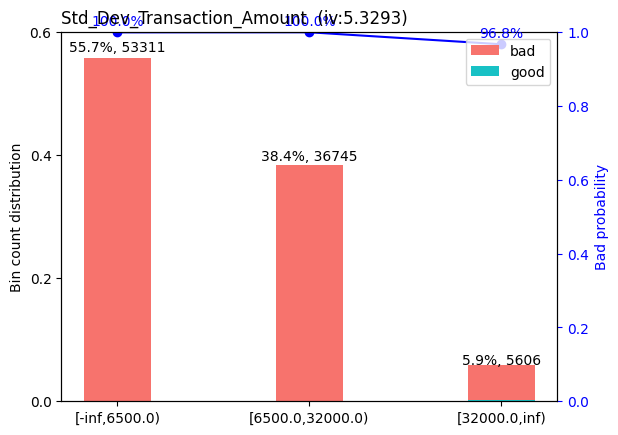

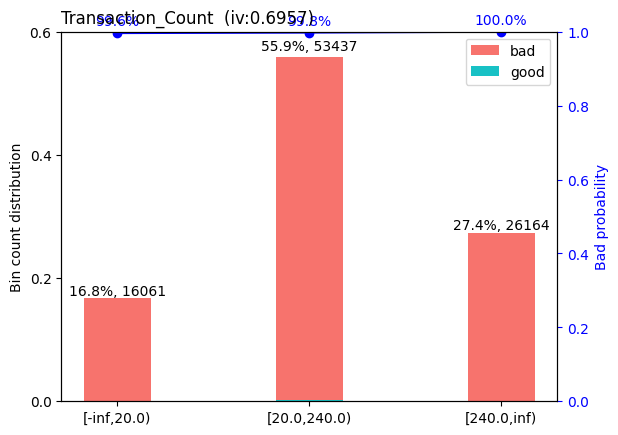

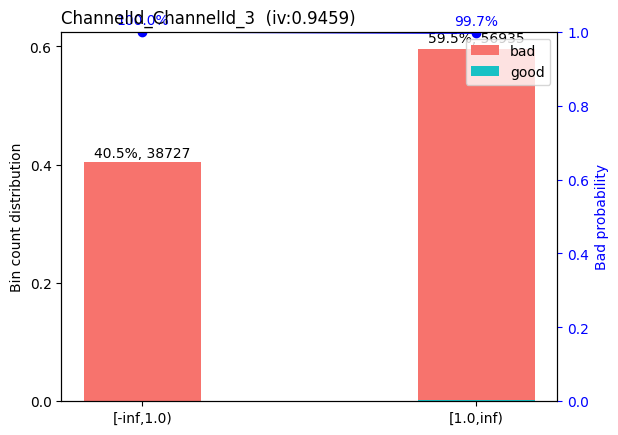

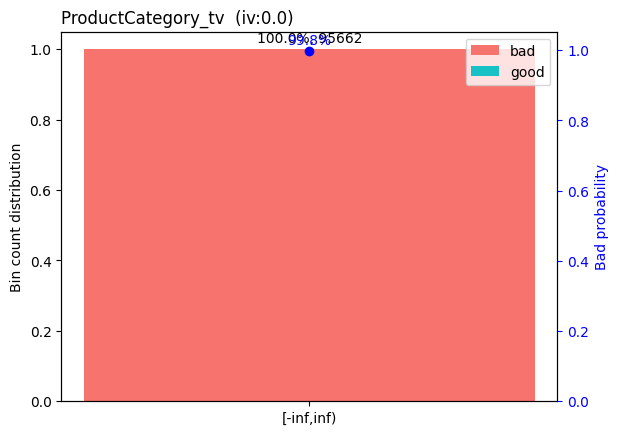

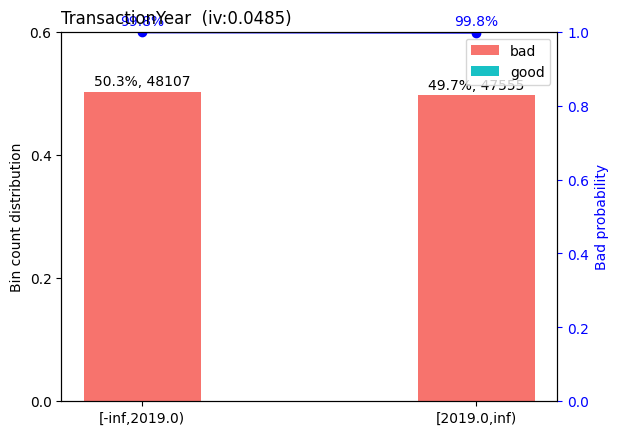

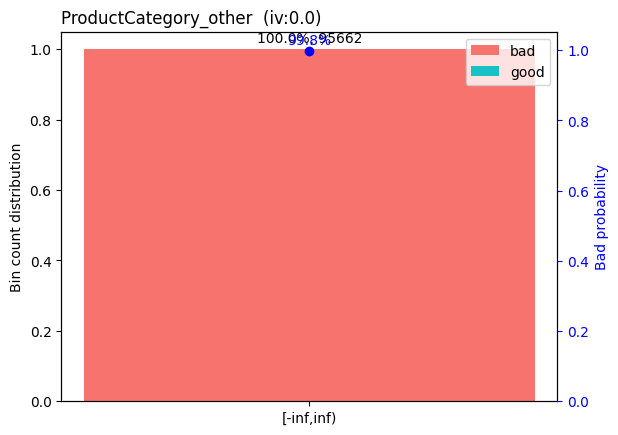

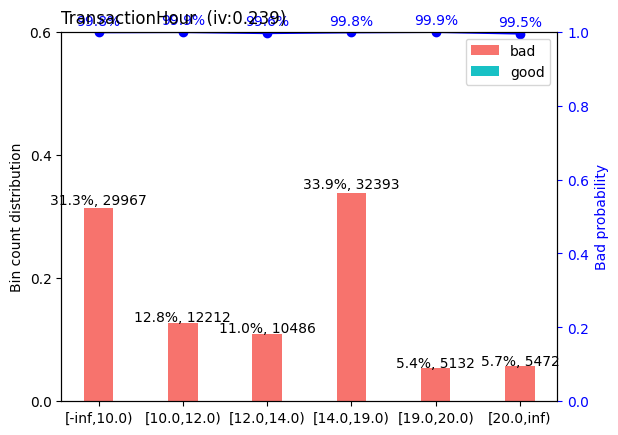

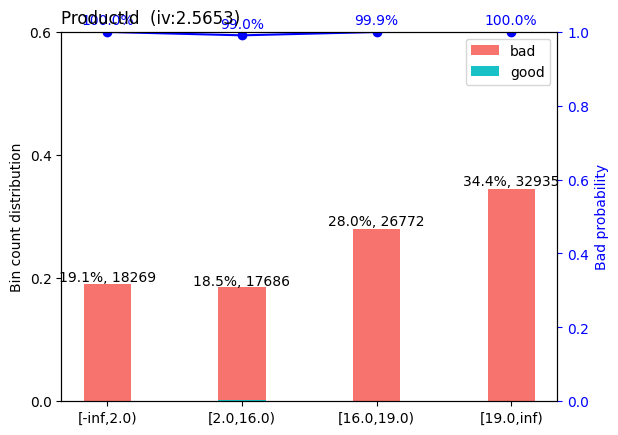

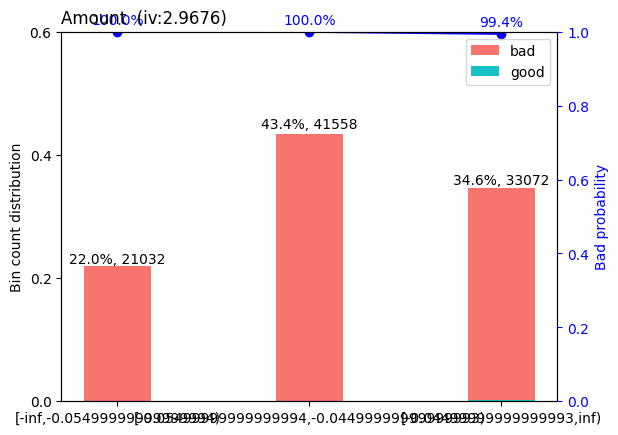

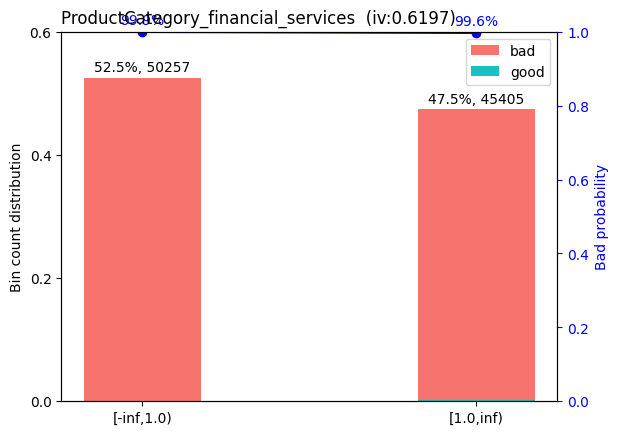

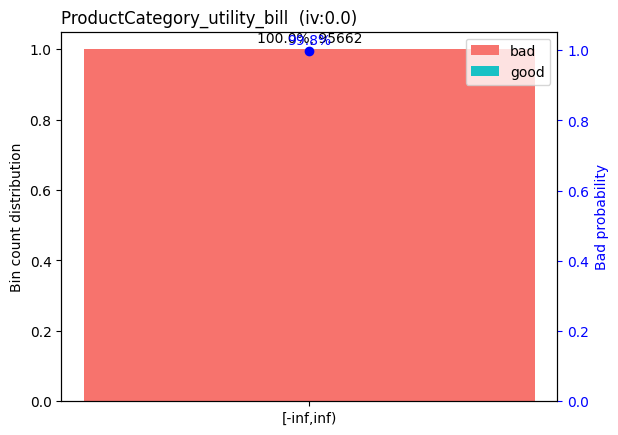

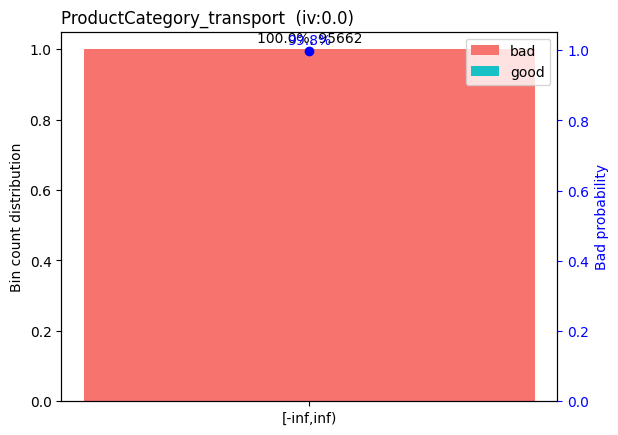

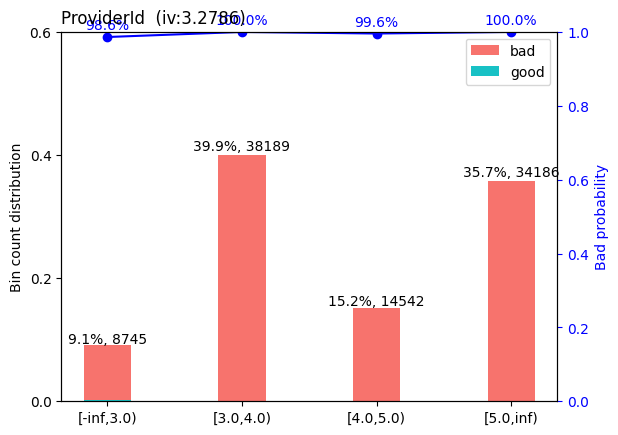

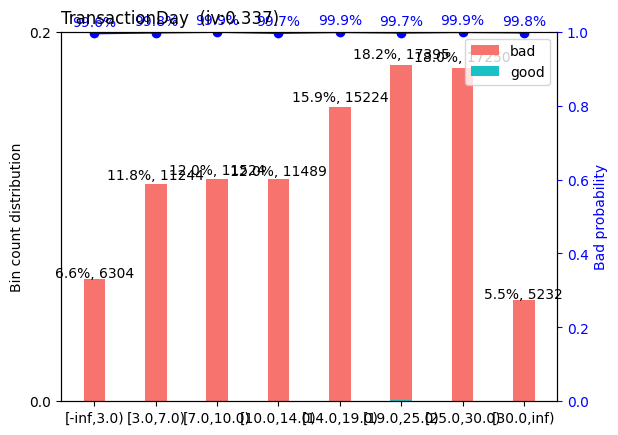

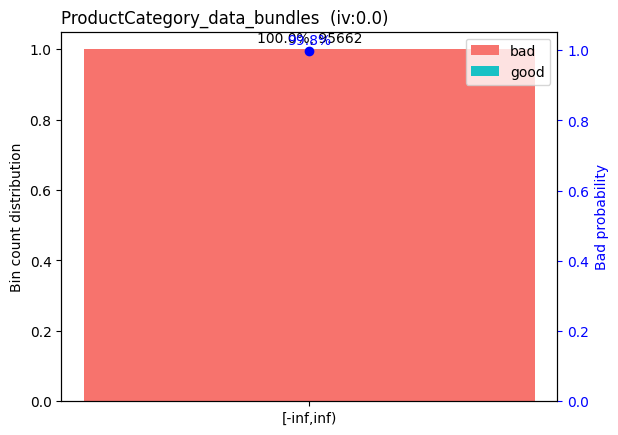

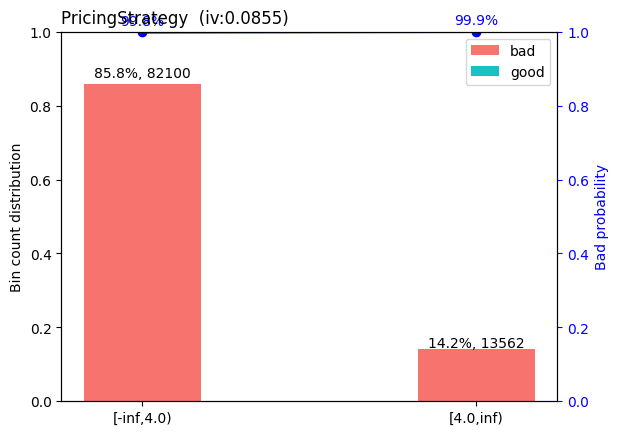

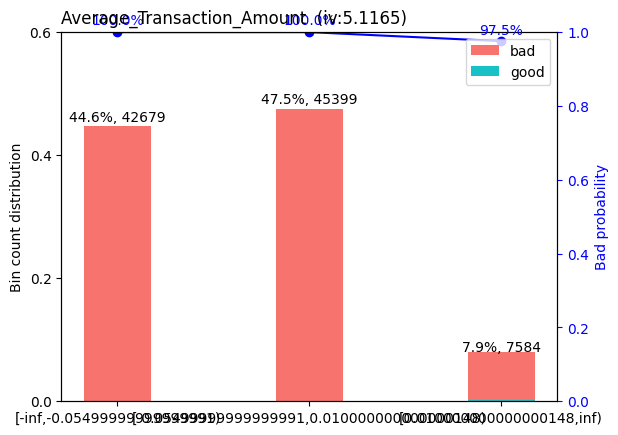

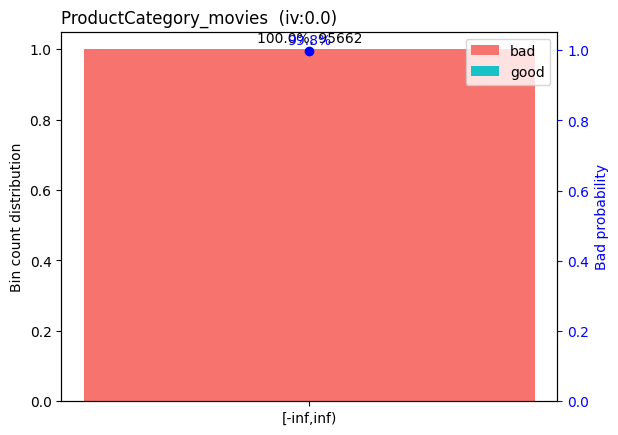

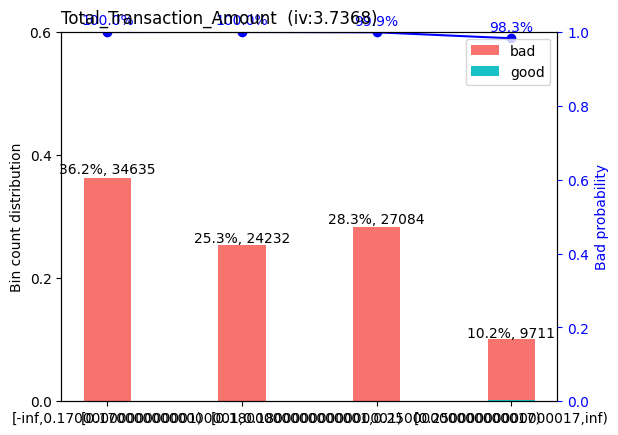

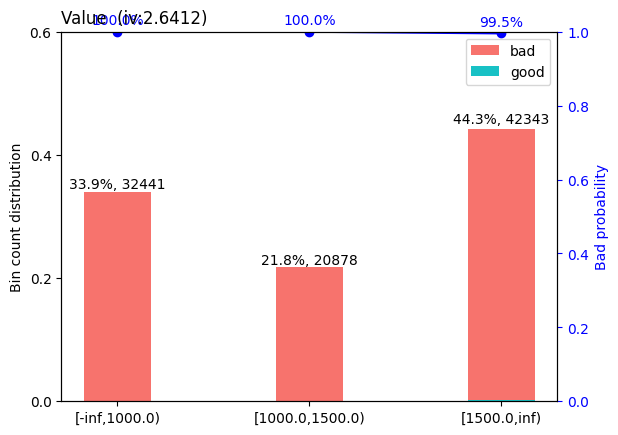

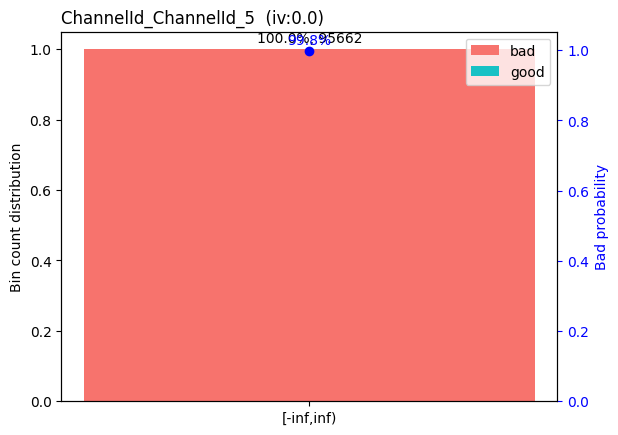

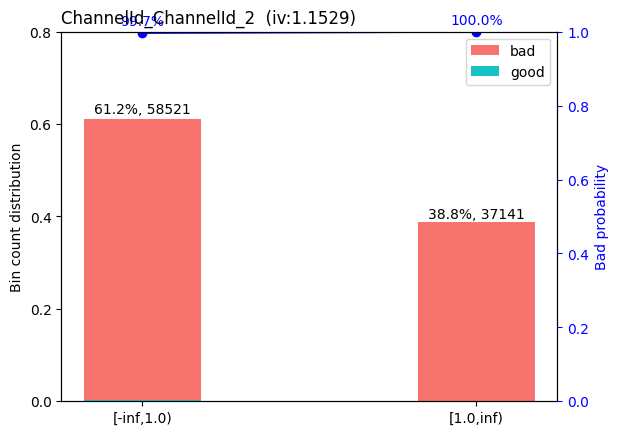

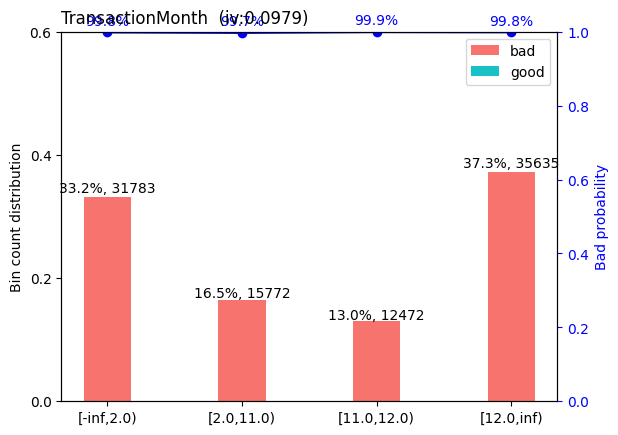

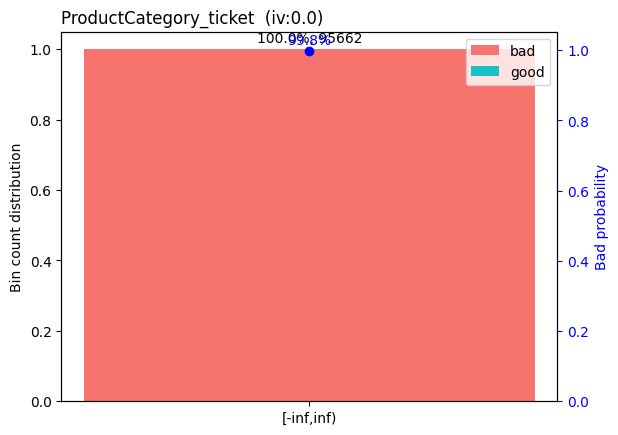

In [92]:
sc.woebin_plot(bins_adj)

In [95]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
Woe transformating on 66963 rows and 24 columns in 00:00:12
[INFO] converting into woe values ...


In [96]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [97]:
train_final.head(10)

,CountryCode_x,ProviderId,ProductId,Amount,Value,PricingStrategy,FraudResult_x,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,FraudResult_y,CountryCode_y,ChannelId_ChannelId_3_woe,ProductCategory_tv_woe,TransactionYear_woe,ProductCategory_other_woe,ProductId_woe,ProductCategory_transport_woe,ProviderId_woe,TransactionDay_woe,PricingStrategy_woe,Average_Transaction_Amount_woe,ProductCategory_movies_woe,Value_woe,TransactionMonth_woe,ProductCategory_ticket_woe,Std_Dev_Transaction_Amount_woe,Transaction_Count_woe,TransactionHour_woe,Amount_woe,ProductCategory_financial_services_woe,ProductCategory_utility_bill_woe,ProductCategory_data_bundles_woe,Total_Transaction_Amount_woe,ChannelId_ChannelId_5_woe,ChannelId_ChannelId_2_woe
23802,0,4,6,-0.013932,5000,2,0,0.185637,-0.062925,338,2338.822685,8,12,12,2018,False,True,False,False,False,False,False,False,False,True,False,0,0,-0.472374,0.0,0.245002,0.0,-1.562838,0.0,-0.782364,-0.521683,-0.094399,3.071208,0.0,-0.807103,0.148341,0.0,2.377259,2.358644,0.231181,-1.034203,-0.565446,0.0,0.0,0.910977,0.0,-0.466385
79123,0,5,1,-0.046371,1000,2,0,0.254480,-0.049387,784,17819.372757,10,31,1,2019,False,False,False,False,False,False,False,False,False,True,False,0,0,-0.472374,0.0,-0.198862,0.0,1.817006,0.0,3.137005,-0.128521,-0.094399,3.420700,0.0,3.742537,0.001921,0.0,4.307864,2.358644,0.640293,4.430955,1.154666,0.0,0.0,-2.152082,0.0,-0.466385
54376,0,3,1,-0.257228,25000,4,0,-4.646278,-0.377665,4091,12952.599898,11,8,1,2019,False,False,False,False,False,False,False,False,True,False,False,0,0,2.162969,0.0,-0.198862,0.0,1.817006,0.0,2.736867,1.201803,0.912454,3.071208,0.0,-0.807103,0.001921,0.0,4.307864,2.358644,0.640293,2.140258,1.154666,0.0,0.0,2.862343,0.0,2.709038
27408,0,5,16,-0.046371,1000,2,0,0.285649,-0.063689,2085,5388.206928,17,14,12,2018,False,False,False,False,False,False,False,False,False,True,False,0,0,-0.472374,0.0,0.245002,0.0,1.351665,0.0,3.137005,0.592431,-0.094399,3.071208,0.0,3.742537,0.148341,0.0,2.377259,2.358644,0.102470,4.430955,1.154666,0.0,0.0,-2.152082,0.0,-0.466385
92240,0,5,16,-0.046371,1000,2,0,0.187667,-0.041554,156,7646.634549,7,10,2,2019,False,False,False,False,False,False,False,False,False,True,False,0,0,-0.472374,0.0,-0.198862,0.0,1.351665,0.0,3.137005,-0.521683,-0.094399,3.420700,0.0,3.742537,-0.511533,0.0,4.307864,-0.164175,0.231181,4.430955,1.154666,0.0,0.0,0.910977,0.0,-0.466385
20288,0,3,19,-0.095031,5000,2,0,0.179753,-0.003710,50,8997.482641,17,7,12,2018,False,True,False,False,False,False,False,False,True,False,False,0,0,2.162969,0.0,0.245002,0.0,2.812009,0.0,2.736867,1.201803,-0.094399,3.420700,0.0,-0.807103,0.148341,0.0,4.307864,-0.164175,0.102470,2.140258,-0.565446,0.0,0.0,3.891521,0.0,2.709038
15395,0,3,1,-0.297778,30000,4,0,-4.646278,-0.377665,4091,12952.599898,15,4,12,2018,False,False,False,False,False,False,False,False,True,False,False,0,0,2.162969,0.0,0.245002,0.0,1.817006,0.0,2.736867,-0.136688,0.912454,3.071208,0.0,-0.807103,0.148341,0.0,4.307864,2.358644,0.102470,2.140258,1.154666,0.0,0.0,2.862343,0.0,2.709038
6187,0,3,19,-0.054887,50,2,0,0.168101,-0.064411,55,1542.657547,7,23,11,2018,False,True,False,False,False,False,False,False,True,False,False,0,0,2.162969,0.0,0.245002,0.0,2.812009,0.0,2.736867,-0.292782,-0.094399,3.071208,0.0,4.183281,0.587194,0.0,2.377259,-0.164175,0.231181,4.430955,-0.565446,0.0,0.0,2.862343,0.0,2.709038
15820,0,3,16,-0.257228,25000,4,0,-4.646278,-0.377665,4091,12952.599898,16,4,12,2018,False,False,False,False,False,False,False,False,True,False,False,0,0,2.162969,0.0,0.245002,0.0,1.351665,0.0,2.736867,-0.136688,0.912454,3.071208,0.0,-0.807103,0.1

In [98]:
train_final = train_final.drop(columns = 'FraudResult_y').rename(columns={'FraudResult_x':'vd'})
test_final = test_final.drop(columns = 'FraudResult_y').rename(columns={'FraudResult_x':'vd'})

In [99]:
# missing check
train_final.stb.missing()

,missing,total,percent
CountryCode_x,0,66963,0.0
Value_woe,0,66963,0.0
ProductCategory_tv_woe,0,66963,0.0
TransactionYear_woe,0,66963,0.0
ProductCategory_other_woe,0,66963,0.0
ProductId_woe,0,66963,0.0
ProductCategory_transport_woe,0,66963,0.0
ProviderId_woe,0,66963,0.0
TransactionDay_woe,0,66963,0.0
PricingStrategy_woe,0,66963,0.0


In [100]:
# missing check
test_final.stb.missing()

,missing,total,percent
CountryCode_x,0,28699,0.0
Value_woe,0,28699,0.0
ProductCategory_tv_woe,0,28699,0.0
TransactionYear_woe,0,28699,0.0
ProductCategory_other_woe,0,28699,0.0
ProductId_woe,0,28699,0.0
ProductCategory_transport_woe,0,28699,0.0
ProviderId_woe,0,28699,0.0
TransactionDay_woe,0,28699,0.0
PricingStrategy_woe,0,28699,0.0


In [102]:
# This function calculates information value (IV) for multiple x variables
sc.iv(train_final, y = 'vd')

,variable,info_value
21,Value,6.867511
35,Amount,6.715809
15,Average_Transaction_Amount_woe,5.310754
45,Std_Dev_Transaction_Amount_woe,5.224029
27,Total_Transaction_Amount_woe,3.454874
13,ProviderId,3.436780
23,ProviderId_woe,3.388327
9,ProductId,3.363932
0,Amount_woe,2.742850
5,ProductId_woe,2.703737


In [103]:
# This function filter variables base on specified conditions, such as information value,
# missing rate, identical value rate.
sc.var_filter(train_final, y = 'vd')

[INFO] filtering variables ...


,Amount_woe,TransactionDay_woe,ChannelId_ChannelId_3,ProductId_woe,TransactionYear,ProductId,ProviderId,TransactionDay,Average_Transaction_Amount_woe,PricingStrategy,Average_Transaction_Amount,Value,TransactionMonth_woe,ProviderId_woe,TransactionMonth,ChannelId_ChannelId_2_woe,Total_Transaction_Amount_woe,Std_Dev_Transaction_Amount,Value_woe,PricingStrategy_woe,Transaction_Count,ProductCategory_financial_services_woe,TransactionHour,Transaction_Count_woe,Amount,ProductCategory_financial_services,TransactionHour_woe,Total_Transaction_Amount,ChannelId_ChannelId_3_woe,Std_Dev_Transaction_Amount_woe,ChannelId_ChannelId_2,TransactionYear_woe,vd
23802,-1.034203,-0.521683,True,-1.562838,2018,6,4,12,3.071208,2,-0.062925,5000,0.148341,-0.782364,12,-0.466385,0.910977,2338.822685,-0.807103,-0.094399,338,-0.565446,8,2.358644,-0.013932,True,0.231181,0.185637,-0.472374,2.377259,False,0.245002,0
79123,4.430955,-0.128521,True,1.817006,2019,1,5,31,3.420700,2,-0.049387,1000,0.001921,3.137005,1,-0.466385,-2.152082,17819.372757,3.742537,-0.094399,784,1.154666,10,2.358644,-0.046371,False,0.640293,0.254480,-0.472374,4.307864,False,-0.198862,0
54376,2.140258,1.201803,False,1.817006,2019,1,3,8,3.071208,4,-0.377665,25000,0.001921,2.736867,1,2.709038,2.862343,12952.599898,-0.807103,0.912454,4091,1.154666,11,2.358644,-0.257228,False,0.640293,-4.646278,2.162969,4.307864,True,-0.198862,0
27408,4.430955,0.592431,True,1.351665,2018,16,5,14,3.071208,2,-0.063689,1000,0.148341,3.137005,12,-0.466385,-2.152082,5388.206928,3.742537,-0.094399,2085,1.154666,17,2.358644,-0.046371,False,0.102470,0.285649,-0.472374,2.377259,False,0.245002,0
92240,4.430955,-0.521683,True,1.351665,2019,16,5,10,3.420700,2,-0.041554,1000,-0.511533,3.137005,2,-0.466385,0.910977,7646.634549,3.742537,-0.094399,156,1.154666,7,-0.164175,-0.046371,False,0.231181,0.187667,-0.472374,4.307864,False,-0.198862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30645,4.430955,0.592431,False,2.812009,2018,19,3,17,3.071208,2,-0.063689,20,0.148341,2.736867,12,2.709038,-2.152082,5388.206928,4.183281,-0.094399,2085,-0.565446,14,2.358644,-0.054643,True,0.102470,0.285649,2.162969,2.377259,True,0.245002,0
82593,-1.034203,-0.791583,True,1.351665,2019,16,5,1,3.071208,2,-0.056236,1500,-0.511533,3.137005,2,-0.466385,3.891521,4450.319367,-0.807103,-0.094399,113,1.154666,19,-0.164175,-0.042316,False,0.952310,0.174920,-0.472374,2.377259,False,-0.198862,0
37597,4.430955,-0.292782,True,1.817006,2018,1,1,22,3.071208,2,-0.066733,1000,0.148341,-1.937353,12,-0.466385,2.862343,5896.326540,3.742537,-0.094399,1,1.154666,19,-0.634397,-0.046371,False,0.952310,0.165122,-0.472374,2.377259,False,0.245002,0
76126,4.430955,0.717501,False,2.812009,2019,19,3,28,3.420700,2,-0.049387,50,0.001921,2.736867,1,2.709038,-2.152082,17819.372757,4.183281,-0.094399,784,-0.565446,11,2.358644,-0.054887,True,0.640293,0.254480,2.162969,4.307864,True,-0.198862,0
